In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("data/processed/real_estate_cleaned.csv")

df.head()


,transaction_date,house_age,mrt_distance,convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Basic summary statistics
df.describe(include="all").transpose()


,count,mean,std,min,25%,50%,75%,max
transaction_date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
mrt_distance,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price_per_unit,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [ ]:
# Check missing values
df.isna().sum()

transaction_date      0
house_age             0
mrt_distance          0
convenience_stores    0
latitude              0
longitude             0
price_per_unit        0
dtype: int64

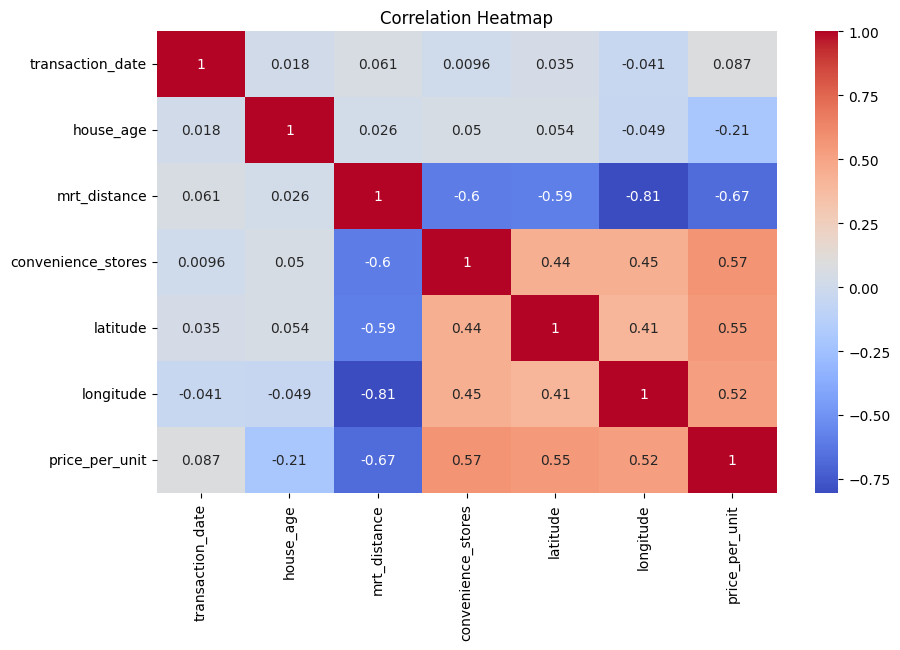

In [5]:
# Correlation matrix (for numeric columns)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


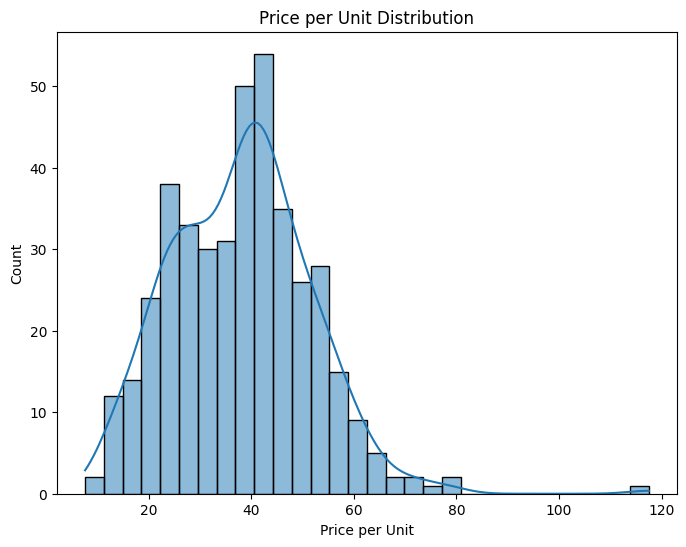

In [8]:
# Price distribution
plt.figure(figsize=(8,6))
sns.histplot(df['price_per_unit'], bins=30, kde=True)
plt.title("Price per Unit Distribution")
plt.xlabel("Price per Unit")
plt.ylabel("Count")
plt.show()


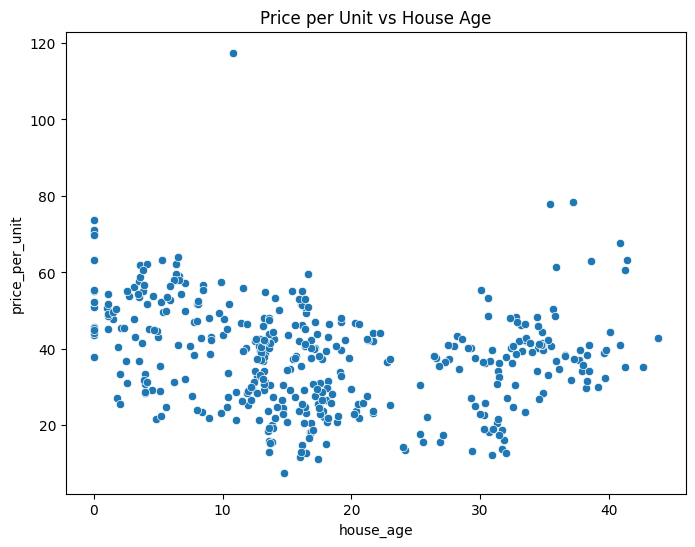

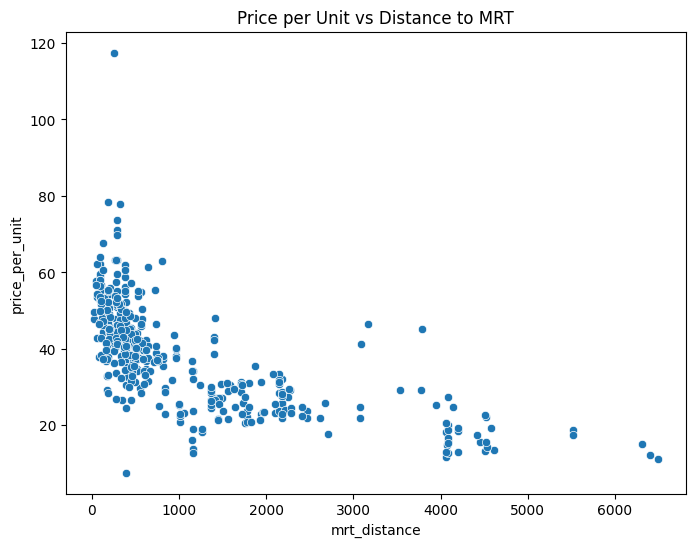

In [12]:
# Scatterplot: House Age vs Price per Unit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="house_age", y="price_per_unit")
plt.title("Price per Unit vs House Age")
plt.show()
# Scatterplot: Distance to Nearest MRT Station vs Price per Unit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="mrt_distance", y="price_per_unit")
plt.title("Price per Unit vs Distance to MRT")
plt.show()

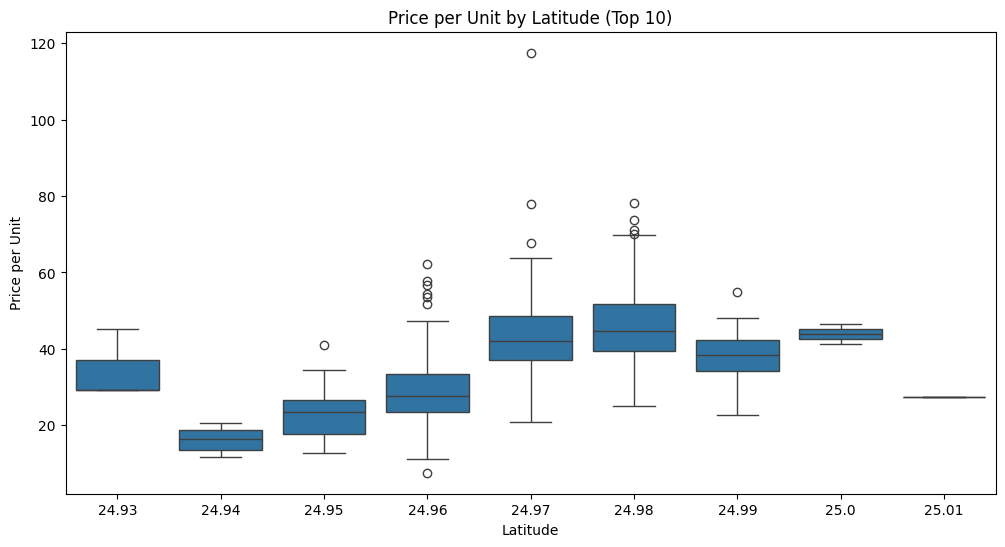

In [14]:
# Price by Latitude (Top 10 most frequent latitudes)
top_latitudes = df['latitude'].round(2).value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['latitude'].round(2).isin(top_latitudes)], 
            x=df['latitude'].round(2), y="price_per_unit")
plt.title("Price per Unit by Latitude (Top 10)")
plt.xlabel("Latitude")
plt.ylabel("Price per Unit")
plt.show()


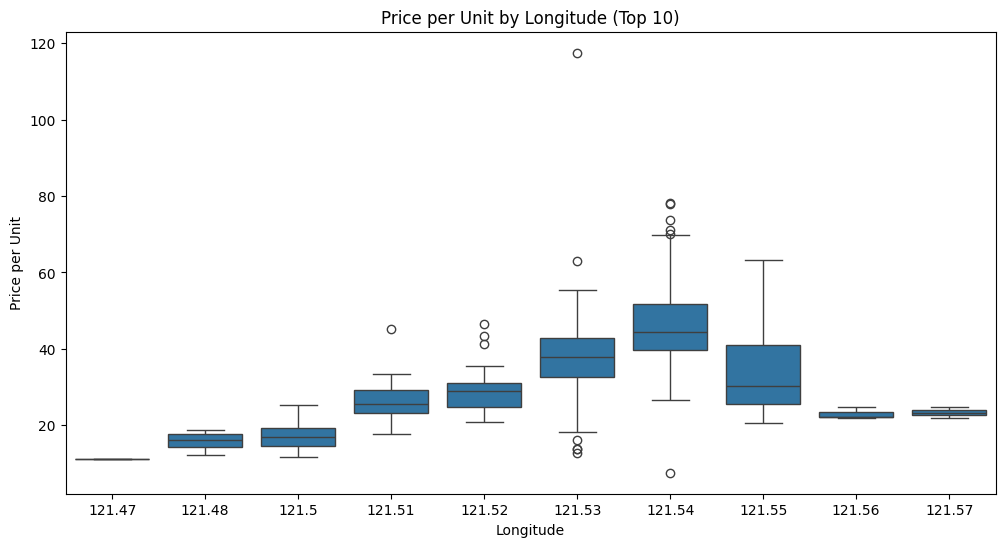

In [15]:
# Price by Longitude (Top 10 most frequent longitudes)
top_longitudes = df['longitude'].round(2).value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['longitude'].round(2).isin(top_longitudes)], 
            x=df['longitude'].round(2), y="price_per_unit")
plt.title("Price per Unit by Longitude (Top 10)")
plt.xlabel("Longitude")
plt.ylabel("Price per Unit")
plt.show()
